<a href="https://colab.research.google.com/github/Eerdozain/Apuntes/blob/main/Estrategia_condor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ -9  -9  -9  -9  -9  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -19 -19
 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19 -19
 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -9  -9  -9  -9]
[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]


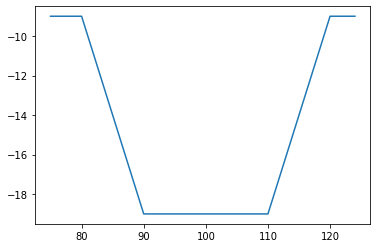

In [2]:
#estrategia cóndor
import numpy as np
import matplotlib.pyplot as plt  


#indicamos el tipo de estrategia cóndor: "comprado" o "vendido"
tipo_estrategia = "vendido"

#establecemos el precio de ejercicio de las opciones call
precio_A = 80
precio_B = 90
precio_C = 110
precio_D = 120

#indicamos la prima de cada una
prima_A = 8
prima_B = 12
prima_C = 10
prima_D = 5

# la cantidad de opciones
opciones_A = 1
opciones_B = 1
opciones_C = 1
opciones_D = 1

#indicamos el margen y calculamos la lista de precios
margen = 5
S = [*range(precio_A - margen, precio_D + margen)]
S

#creamos vectores para almacenar el valor de cada opción en cada nivel de S
valor_A = [0]*len(S)
valor_B = [0]*len(S)
valor_C = [0]*len(S)
valor_D = [0]*len(S)

#en cóndor comprado la secuencia de operaciones con opciones es: compra-venta-venta-compra y en el cóndor vendido:venta-compra-compra-venta


#opción A
for i in range(0, len(S)):
  if S[i] < precio_A:
    valor_A[i] = 0 - prima_A
  else:
    valor_A[i] = S[i] - precio_A - prima_A

#opción B
for i in range(0, len(S)):
  if S[i] < precio_B:
    valor_B[i] = 0 - prima_B
  else:
    valor_B[i] = S[i] - precio_B - prima_B

#opción C
for i in range(0, len(S)):
  if S[i] < precio_C:
    valor_C[i] = 0 - prima_C
  else:
    valor_C[i] = S[i] - precio_C - prima_C

#opción D
for i in range(0, len(S)):
  if S[i] < precio_D:
    valor_D[i] = 0 - prima_D
  else:
    valor_D[i] = S[i] - precio_D - prima_D

#convertimos las listas en vectores
valor_A = np.array(valor_A)
valor_B = np.array(valor_B)
valor_C = np.array(valor_C)
valor_D = np.array(valor_D)

#arreglamos la fórmula para la opción comprado
if tipo_estrategia == "Comprado":
  valor_A = valor_A * opciones_A
  valor_B = valor_B * opciones_B * -1
  valor_C = valor_C * opciones_C * -1
  valor_D = valor_D * opciones_D
  
else:
  valor_A = valor_A * opciones_A * -1
  valor_B = valor_B * opciones_B
  valor_C = valor_C * opciones_C
  valor_D = valor_D * opciones_D * -1

#agregamos todos los vectores
valor_total = valor_A + valor_B + valor_C + valor_D

#mostramos el valor total de la operación para cada precio subyacente
print(valor_total)
print(S)

#lo representamos en un gráfico
plt.plot(S, valor_total)  
plt.show()